# Clustering clean model 

## 1. Import the data and all the packages as well as logging into the api

In [73]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import Javascript
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler


In [74]:
#import the data and join them into one big data frame
#will only import the data in the data file if its a csv file. 

df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))


## 2. Cleaning the data and leaving it ready for scaling

In [75]:
# first droping basic duplicates

df_final = df.drop_duplicates()


In [76]:
# Setting the scaler variable 

scaler = StandardScaler()

In [111]:
#need to drop, arti@st, uri, analysis_url, id, track_href, type, Uris 

df_f2 = df_final.drop(["Artists", "Songs", "uri", "analysis_url", "id", "track_href", "type", "Uris", "time_signature", "duration_ms"], axis=1)



In [112]:
#dropping the unammed colum so that it doesn't disturb our data

df_f3 = df_f2.loc[:, ~df_f2.columns.str.contains('^Unnamed')]



In [113]:
#we remove all empty values 

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


df_f3 = clean_dataset(df_f3)
df_f3

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.000078,0.429,0.631,0.004110,4.0,0.1750,-11.514,0.0,0.0769,162.734,0.3760
1,0.024000,0.362,0.961,0.000009,2.0,0.1590,-5.664,1.0,0.0857,164.019,0.4910
2,0.060500,0.242,0.953,0.000034,4.0,0.1350,-5.555,0.0,0.1150,153.738,0.3420
3,0.004840,0.402,0.873,0.000073,4.0,0.1570,-3.209,0.0,0.0586,125.443,0.6840
4,0.000071,0.508,0.912,0.403000,9.0,0.0492,-8.049,0.0,0.0368,117.582,0.6820
...,...,...,...,...,...,...,...,...,...,...,...
790,0.740000,0.574,0.485,0.857000,7.0,0.2960,-10.661,1.0,0.2770,125.005,0.0848
791,0.008260,0.746,0.562,0.864000,11.0,0.1020,-14.477,0.0,0.0423,129.021,0.2270
792,0.003390,0.735,0.671,0.615000,5.0,0.0731,-6.589,1.0,0.0358,132.012,0.5240
793,0.369000,0.594,0.651,0.000000,8.0,0.1820,-7.640,1.0,0.2580,139.744,0.4050


## 3. Scaling and cleaning the data

In [114]:
#using the scaler we set in part 2 
X_scaled = scaler.fit_transform(df_f3)

#it will output an array

In [115]:
#We extract the scaler to use in notebook2 and have an easy acces to it 

import pickle
pickle.dump(scaler, open("scaler_final.pkl", "wb"))

In [116]:
# we can run the cell below to check that our scaled array still works as a data frame 

#pd.DataFrame(X_scaled, columns=df_f3.columns)

## 4. Clustering the data and making the model. 

In [117]:
#we import the kmeans function here to keep it neat

from sklearn.cluster import KMeans 

In [118]:
#we have set clusters to 15 since we saw it as optimal and the number of iterations to 100 since it seemed like 
#a good arbitrary baseline


k_means_sp = KMeans(n_clusters=51,
                    init="k-means++",
                    n_init=200,  
                    max_iter=300,
                    algorithm="elkan",
                    random_state=None)



In [119]:
#we now fit the model to our data
k_means_sp.fit(X_scaled)

KMeans(algorithm='elkan', n_clusters=51, n_init=200)

In [120]:
#we check the cluster distribution 

clusters = k_means_sp.predict(X_scaled)
clusters = pd.Series(clusters)
clusters.value_counts().sort_values()

38     223
48     236
34     247
42     261
32     282
18     331
9      357
6      358
43     364
44     377
28     422
30     438
14     442
47     478
13     482
50     484
8      507
7      512
29     513
21     516
24     516
23     516
3      527
49     528
11     536
16     539
37     561
5      580
33     589
36     594
10     594
41     611
26     654
19     660
39     693
15     693
45     696
46     739
25     752
40     753
1      784
12     821
4      838
17     861
27     871
20     893
35     926
0      993
2     1159
31    1302
22    1371
dtype: int64

In [121]:
#we pickle our results for later use in notebook 2 

import pickle

pickle.dump(k_means_sp, open("KMeans_final.pkl", "wb"))

## 5. Deciding what model to use, to experiment with later

In [107]:
#making a fancy clustering shades map to use in explanation of the data 

Automatically created module for IPython interactive environment
For n_clusters = 51 The average silhouette_score is : 0.3691712303792271
For n_clusters = 54 The average silhouette_score is : 0.3556466536056441
For n_clusters = 55 The average silhouette_score is : 0.3627486632721639
For n_clusters = 60 The average silhouette_score is : 0.36255192284445287


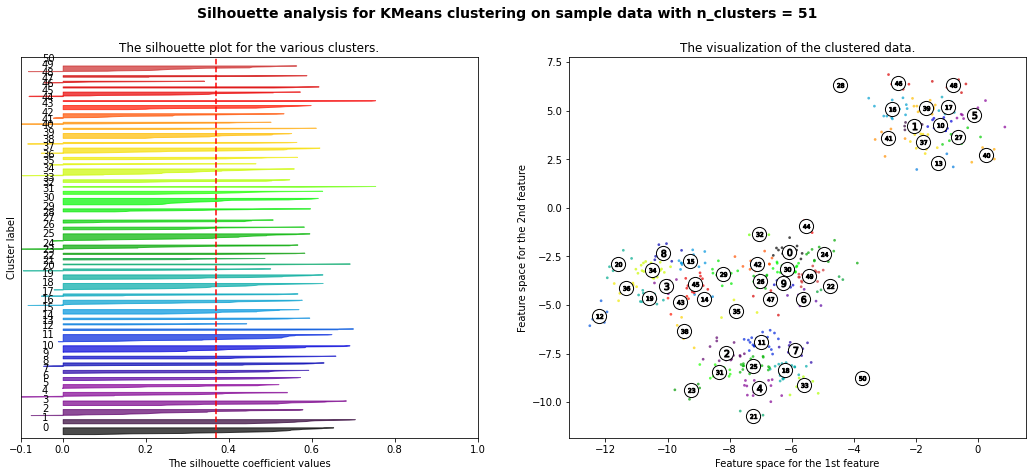

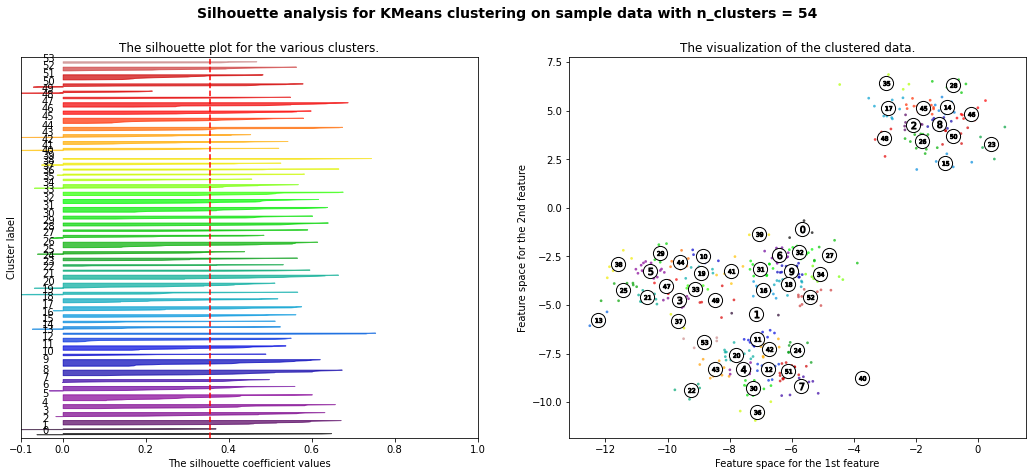

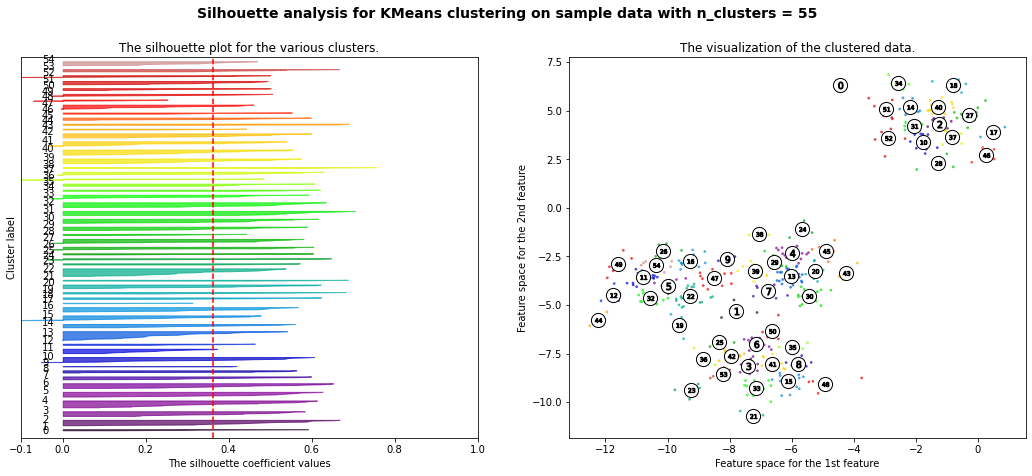

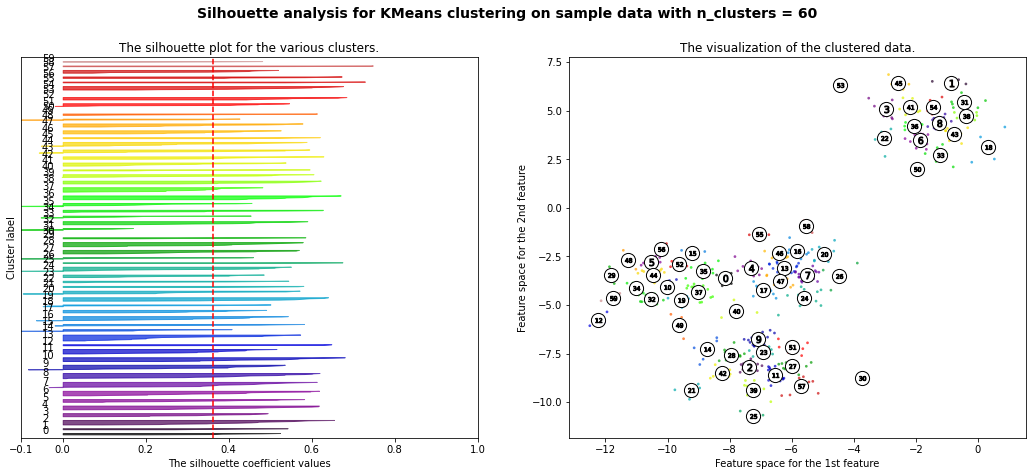

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [ 51, 54, 55, 60 ]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 6. Exporting the curated data frame with a row of clusters for later prediction 

In [122]:
#we start with df_fianl since we need the info from the artistss and uris 

df_f5 = df_final.drop(["Uris"], axis=1)
df_f6 = df_f5.loc[:, ~df_f5.columns.str.contains('^Unnamed')]
df_final_clus = df_f6.copy().dropna()

In [123]:
df_final_clus["clusters"] = clusters

In [124]:
df_final_clus.to_csv("final_data_clusters.csv")